**K-Means Clustering** 
The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible and ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [ ]:
# Importing Liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
 
#load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() #see the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


How do you find the optimum number of clusters of KMeans? How does one determine the value of K?

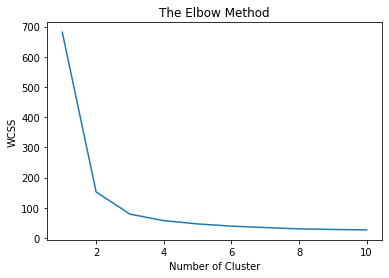

In [ ]:

x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn .cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

#plotting the result onto a line graph
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()


You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.
Here we can choose the number of clusters as 3.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters= 3, init='k-means++',
                max_iter = 300, n_init= 10, random_state= 0)
y_kmeans = kmeans.fit_predict(x)

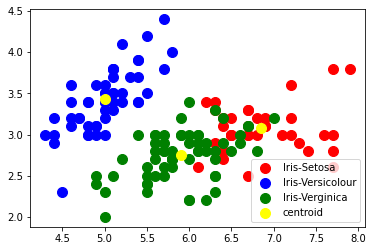

In [ ]:
# visualising the cluster - on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans== 0, 1],
            s = 100, c='red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-Verginica')

#plotting the centroid of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'centroid')
plt.legend()
